In [1]:
import numpy as np

# Set seed for reproducibility
np.random.seed(1000)

# Step 1: Generate matrix A (1000x10)
A = np.random.randn(1000, 10)

# Step 2: Generate the true parameter vector x_bar (10x1)
x_bar = np.zeros((10, 1))
for j in range(10):
    i = j + 1
    if i % 2 == 1:  # Odd index
        x_bar[j] = (-i + (i + 1)) * np.random.random_sample() - (i + 1)
    else:  # Even index
        x_bar[j] = ((i + 1) - i) * np.random.random_sample() + i

# Step 3: Generate noise vector e (1000x1)
e = np.random.randn(1000, 1)

# Step 4: Compute target vector y (1000x1)
y = A @ x_bar + e

# Display the results
print("Matrix A:")
print(A)
print("\nTrue parameter vector (x_bar):")
print(x_bar)
print("\nTarget vector (Y):")
print(y)

Matrix A:
[[-0.8044583   0.32093155 -0.02548288 ... -0.47998308  0.5950355
  -0.46466753]
 [ 0.66728131 -0.80611561 -1.19606983 ...  0.70569237  1.27179528
  -0.98674733]
 [-0.33483545 -0.0994817   0.4071921  ... -0.38314741 -0.82294096
   1.60008337]
 ...
 [ 0.4520184  -0.47786694 -1.9209351  ... -0.91576825  1.28648295
   1.96612251]
 [ 1.5847291   1.04574815  1.74030946 ... -0.95352929  0.74063574
   1.35391039]
 [-1.27767888  0.60413859 -0.81028802 ... -0.06434491  0.50570314
  -1.63094421]]

True parameter vector (x_bar):
[[-1.06258705]
 [ 2.94307072]
 [-3.34150552]
 [ 4.58252615]
 [-5.75947573]
 [ 6.93512469]
 [-7.61893094]
 [ 8.16818187]
 [-9.2179964 ]
 [10.00022174]]

Target vector (Y):
[[-3.84943546e+00]
 [-1.25706891e+01]
 [ 3.63121599e+01]
 [ 3.63405580e+01]
 [ 5.55093942e+00]
 [-7.82253463e+00]
 [-1.75872918e+01]
 [ 2.84011753e+01]
 [ 2.21735533e+01]
 [ 2.11419615e+01]
 [-3.01675507e+01]
 [ 2.02515788e+01]
 [ 6.33261119e+00]
 [-1.14486907e+00]
 [ 1.83388972e+01]
 [-1.535305

For lambda value = 0.001
x_star = 
[[-1.04982177]
 [ 2.95189509]
 [-3.34297859]
 [ 4.60955451]
 [-5.71175695]
 [ 6.89876962]
 [-7.62878631]
 [ 8.1682038 ]
 [-9.22220362]
 [10.05668355]]



/var/folders/kq/vv3n1vnx70b7hcbwwrw4m02r0000gn/T/ipykernel_23658/1034558410.py:117: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  fx_val.append(m.log(max(func_diff, epsilon)))  # Use max to ensure non-negative input


For lambda value = 0.01
x_star = 
[[-1.04981532]
 [ 2.95187515]
 [-3.3429499 ]
 [ 4.60950618]
 [-5.71171416]
 [ 6.8987132 ]
 [-7.6287238 ]
 [ 8.1681411 ]
 [-9.22213175]
 [10.05660304]]

For lambda value = 0.1
x_star = 
[[-1.04975083]
 [ 2.95167581]
 [-3.34266298]
 [ 4.60902294]
 [-5.71128631]
 [ 6.89814909]
 [-7.62809876]
 [ 8.16751414]
 [-9.22141314]
 [10.05579793]]

For lambda value = 1
x_star = 
[[-1.04910633]
 [ 2.94968373]
 [-3.33979653]
 [ 4.60419596]
 [-5.70701119]
 [ 6.89251306]
 [-7.621854  ]
 [ 8.16124981]
 [-9.21423321]
 [10.04775406]]



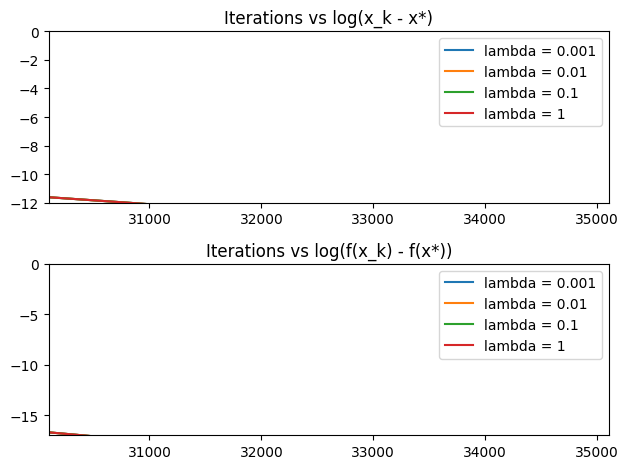

In [3]:
import numpy as np
import math as m
import matplotlib.pyplot as plt


# Define the function, gradient, and Hessian
def func(A, y, x, l):
    f = 0.5 * (np.linalg.norm(A @ x - y)) ** 2 + 0.5 * l * x.T @ x
    return f


def grad(A, y, x, l):
    g = A.T @ A @ x - A.T @ y + l * x
    return g


def hess(A, y, x, l):
    h = A.T @ A + l * np.identity(10, dtype=float)
    return h


# Define tolerance level
def tolerance(p):
    return 10 ** (-p)


# Define the Newton optimization algorithm
def newton_opt(x, A, y, p, l):
    history = []
    TLevel = tolerance(p)
    count = 0

    # Perform the Newton optimization iterations
    while np.linalg.norm(grad(A, y, x, l)) > TLevel:
        h = hess(A, y, x, l)
        hess_inv = np.linalg.inv(h)

        # Initialize values for a, gamma, and p
        a = 0.99
        gamma = 0.5
        p_factor = 0.5

        d = -grad(A, y, x, l)

        # Perform inexact line search
        while func(A, y, x + a * d, l) > func(A, y, x, l) + gamma * a * (grad(A, y, x, l).T @ d):
            a = p_factor * a

        # Update the parameters
        x = x + a * hess_inv @ d

        # Save the history of the parameters
        history.append((x, func(A, y, x, l), count))

        # Increment the iteration counter
        count += 1

    return x, func(A, y, x, l), count, history


# First, we prepare our data
np.random.seed(1000)

# Generate A
A = np.random.randn(1000, 10)

# Generate x_bar
x_bar = np.zeros((10, 1))
for j in range(10):
    i = j + 1
    if i % 2 == 1:  # odd
        x_bar[j] = (-i + (i + 1)) * np.random.random_sample() - (i + 1)
    else:  # even
        x_bar[j] = ((i + 1) - i) * np.random.random_sample() + i

# Generate noise (e)
e = np.random.randn(1000, 1)

# Generate y
y = A @ x_bar + e

# Set tolerance level
p = 3  # Reduced for faster computation

# Initialize variables for storing results
lamb_iter = []
lamb_x = []
lamb_fx = []

# Starting point
x0 = np.zeros((10, 1))

# Lambda values to test
lamb = [0.001, 0.01, 0.1, 1]

# Run Newton optimization for different lambda values
epsilon = 1e-10  # Small value to avoid log(0)

for l in lamb:
    I = []
    x_val = []
    fx_val = []

    x_star, f_star, count, history = newton_opt(x0, A, y, p, l)

    print(f"For lambda value = {l}")
    print(f"x_star = \n{x_star}\n")

    for i in range(count - 5000, count):  # Adjust range to avoid excessive iterations
        I.append(history[i][2])

        # Avoid math domain errors
        norm_diff = np.linalg.norm(history[i][0] - x_star)
        func_diff = abs(history[i][1] - f_star)

        x_val.append(m.log(max(norm_diff, epsilon)))  # Use max to ensure non-negative input
        fx_val.append(m.log(max(func_diff, epsilon)))  # Use max to ensure non-negative input

    lamb_iter.append(I)
    lamb_x.append(x_val)
    lamb_fx.append(fx_val)

# Plotting
fig, (ax1, ax2) = plt.subplots(2)

# Plot log(x_k - x*) vs iterations
for i, l in enumerate(lamb):
    ax1.plot(lamb_iter[i], lamb_x[i], label=f"lambda = {l}")

ax1.legend()
ax1.set_title("Iterations vs log(x_k - x*)")
ax1.set_xlim([count - 5005, count])
ax1.set_ylim([-12, 0])

# Plot log(f(x_k) - f(x*)) vs iterations
for i, l in enumerate(lamb):
    ax2.plot(lamb_iter[i], lamb_fx[i], label=f"lambda = {l}")

ax2.legend()
ax2.set_title("Iterations vs log(f(x_k) - f(x*))")
ax2.set_xlim([count - 5005, count])
ax2.set_ylim([-17, 0])

plt.tight_layout()
plt.show()

For lambda value = 0.001

x_star = 
[[ 0.91253496]
 [ 1.87652299]
 [-1.16635582]
 [-0.36444713]
 [ 0.15009575]
 [ 1.36544697]
 [-0.05786626]
 [ 0.60336686]
 [-0.59093683]
 [ 0.86919399]]

For lambda value = 0.01

x_star = 
[[ 0.91252578]
 [ 1.8765064 ]
 [-1.1663458 ]
 [-0.36444369]
 [ 0.15009428]
 [ 1.36543436]
 [-0.05786547]
 [ 0.60336151]
 [-0.59093364]
 [ 0.8691883 ]]

For lambda value = 0.1

x_star = 
[[ 0.912434  ]
 [ 1.87634052]
 [-1.16624562]
 [-0.36440936]
 [ 0.15007951]
 [ 1.36530825]
 [-0.05785758]
 [ 0.60330804]
 [-0.59090173]
 [ 0.86913144]]

For lambda value = 1

x_star = 
[[ 0.91151717]
 [ 1.87468335]
 [-1.16524484]
 [-0.36406646]
 [ 0.14993201]
 [ 1.36404845]
 [-0.0577787 ]
 [ 0.60277382]
 [-0.59058281]
 [ 0.8685632 ]]



/var/folders/kq/vv3n1vnx70b7hcbwwrw4m02r0000gn/T/ipykernel_23658/449112332.py:104: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  fx_val.append(m.log(max(f_diff, epsilon)))


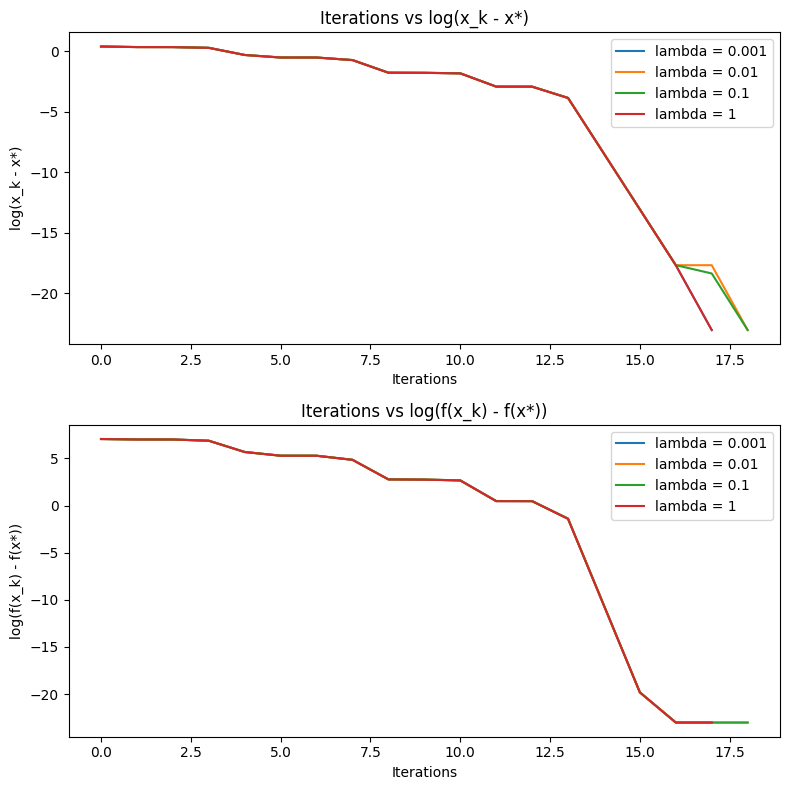

In [4]:
import numpy as np
import math as m
import matplotlib.pyplot as plt


# Define the function, gradient, and L2 norm
def func(A, y, x, l):
    return 0.5 * np.linalg.norm(A @ x - y) ** 2 + 0.5 * l * (x.T @ x)


def grad(A, y, x, l):
    return A.T @ (A @ x - y) + l * x


def L2_norm(g):
    return np.linalg.norm(g)


# Define tolerance level
def tolerance(p):
    return 10 ** (-p)


# BFGS line search algorithm
def BFGS_line_search(x, A, y, B0, p, l):
    g = grad(A, y, x, l)
    history = []
    TLevel = tolerance(p)
    count = 0

    while L2_norm(g) > TLevel:
        # Initialize line search parameters
        a0 = 0.99
        p_factor = 0.5
        gamma = 0.5

        # Compute direction
        d = -B0 @ g

        # Line search loop
        while func(A, y, x + a0 * d, l) > func(A, y, x, l) + gamma * a0 * g.T @ d:
            a0 *= p_factor

        # Store old and new values of x
        x_old = x
        x = x + a0 * d
        g_old = g

        # Compute BFGS parameters
        s = x - x_old
        g = grad(A, y, x, l)
        z = g - g_old

        # Update B using the BFGS formula
        z_s = z.T @ s
        if z_s != 0:  # Ensure division is valid
            B0 = (
                (np.eye(len(B0)) - (s @ z.T) / z_s) @ B0 @ (np.eye(len(B0)) - (z @ s.T) / z_s)
                + (s @ s.T) / z_s
            )

        # Save iteration history
        history.append((x, func(A, y, x, l), count))

        # Increment iteration counter
        count += 1

    return x, func(A, y, x, l), count, history


# Generate data
np.random.seed(1000)
A = np.random.randn(1000, 10)
x_bar = np.random.randn(10, 1)
e = np.random.randn(1000, 1)
y = A @ x_bar + e

# Define parameters
p = 5
x0 = np.zeros((10, 1))
B0 = np.eye(10)
lambdas = [0.001, 0.01, 0.1, 1]

# Initialize result storage
lamb_iter, lamb_x, lamb_fx = [], [], []
epsilon = 1e-10  # Small value to avoid log(0)

# Perform BFGS optimization for each lambda
for l in lambdas:
    I, x_val, fx_val = [], [], []

    x_star, f_star, count, history = BFGS_line_search(x0, A, y, B0, p, l)

    print(f"For lambda value = {l}\n")
    print(f"x_star = \n{x_star}\n")

    for i in range(count):
        I.append(history[i][2])
        x_diff = np.linalg.norm(history[i][0] - x_star)
        f_diff = abs(history[i][1] - f_star)

        # Avoid math domain error in log
        x_val.append(m.log(max(x_diff, epsilon)))
        fx_val.append(m.log(max(f_diff, epsilon)))

    lamb_iter.append(I)
    lamb_x.append(x_val)
    lamb_fx.append(fx_val)

# Plot results
fig, (ax1, ax2) = plt.subplots(2, figsize=(8, 8))

# Plot log(x_k - x*) vs iterations
for i, l in enumerate(lambdas):
    ax1.plot(lamb_iter[i], lamb_x[i], label=f"lambda = {l}")
ax1.legend()
ax1.set_title("Iterations vs log(x_k - x*)")
ax1.set_xlabel("Iterations")
ax1.set_ylabel("log(x_k - x*)")

# Plot log(f(x_k) - f(x*)) vs iterations
for i, l in enumerate(lambdas):
    ax2.plot(lamb_iter[i], lamb_fx[i], label=f"lambda = {l}")
ax2.legend()
ax2.set_title("Iterations vs log(f(x_k) - f(x*))")
ax2.set_xlabel("Iterations")
ax2.set_ylabel("log(f(x_k) - f(x*))")

plt.tight_layout()
plt.show()